In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import centroid, fcluster
from sklearn.neighbors import NearestCentroid

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import ward, median, centroid, weighted, average, complete, single, fcluster
from scipy.spatial.distance import pdist

from scipy.spatial.distance import euclidean
import scipy.spatial.distance as ssd

from sklearn.metrics import silhouette_samples, silhouette_score

import math

import glob

import warnings

warnings.filterwarnings("ignore")

Author: Negar Nahali, 2024.
The link to this code was originally posted on [Zenodo](https://zenodo.org/records/10853150)

In [3]:
# In this part of the code, we define the clustering algorithm and find the cluster centroids for Oblate0.33


# This is the function to find the polymer monomers coordinates from LAMMPS trajectory snapshots
def import_data(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_polymer = df[df["id"] > 630]
    return df_filtered_polymer[["x", "y", "z"]]


# This is the function to find the shell(confinement) monomers coordinates from LAMMPS trajectory snapshots
def import_wall(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_wall = df[df["id"] < 631]
    return df_filtered_wall[["x", "y", "z"]]


# The clustering algorithm
def run_agglomerated_clustering(df):
    hac = hc.fit(df)
    membership = hac.labels_
    return membership


def filter_cluster(df, membership):
    df = df.copy().reset_index(drop=True)
    df["label"] = membership
    cluster_sizes = df.groupby("label").count()["x"].to_dict()
    df["size"] = df["label"].apply(lambda id: cluster_sizes[id])
    return df[(1 < df["size"]) & (df["size"] < 4)]


def myfunction(x):
    return math.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2)


def min_dis_wall(x):
    return x


# The directory to LAMMPS output trajectory files
# Folder path for LAMMPS output - files not included
folder_path = "/Users/negarna/Dropbox (UiO)/clustering_data_new3/Oblate0.33/no_colloids/half_energy/"
j = 10**9
# imax is the maximum number of input reads
imax = 2 * 10**9
np.set_printoptions(floatmode="unique")
individual_clusters_by_size = []
num_of_clusters_per_file = []
Centroids_dis = []
Centroids_periphery = []
min_peri2 = []
all_centroids = []
iterator = 0

# defining the clustering model
hc = AgglomerativeClustering(n_clusters=None, affinity="euclidean", linkage="single", distance_threshold=0.970)
file_list = glob.glob(folder_path + "O_half.*")
for i in range(1, len(file_list)):
    file_name = folder_path + "O_half.dump." + str(j)
    df = import_data(file_name)
    membership = run_agglomerated_clustering(df)
    df_filtered = filter_cluster(df, membership)

    clf = NearestCentroid(metric="euclidean")
    clf.fit(df_filtered[["x", "y", "z"]], df_filtered[["label"]])
    rr = np.apply_along_axis(myfunction, axis=1, arr=clf.centroids_)
    Centroids_dis.extend(rr)
    all_centroids.extend(clf.centroids_)
    ############## PERIPHERY
    np_wall = import_wall(file_name).to_numpy()


# a,b and c are the minor and major axes of the Oblate spheroid, actually the max and min that the polymer
# monomers could explore inside the confinement shell
a = 2.7
b = 8.1
c = 8.1

# Here, we put 103500 random points inside the confinment shell to find the distribution of the cluster centroids
# in the Control case

x = []
y = []
z = []
min_peri3 = []
r = []
n = 0
while n < 10350:
    x1 = float(np.random.uniform(-a, a))
    y1 = float(np.random.uniform(-b, b))
    z1 = float(np.random.uniform(-c, c))
    if (x1**2 / a**2) + (y1**2 / b**2) + (z1**2 / c**2) < 1.0:
        x.append(x1)
        y.append(y1)
        z.append(z1)
        n = n + 1

x = np.array(x)
y = np.array(y)
z = np.array(z)
dis_peri = np.ndarray(630, float)
for ii in range(0, 10350):
    for jj in range(0, 630):
        dis_peri[jj] = np.sqrt(
            (x[ii] - np_wall[jj, 0]) ** 2 + (y[ii] - np_wall[jj, 1]) ** 2 + (z[ii] - np_wall[jj, 2]) ** 2
        )

    min_p = float(np.round(min(dis_peri).astype(np.float64), 3))
    min_peri3.append(min_p)
    dis_r = np.sqrt((x[ii]) ** 2 + (y[ii]) ** 2 + (z[ii]) ** 2)
    r.append(dis_r)


df_Control_Oblate13 = pd.DataFrame({"r": r, "p": min_peri3})

In [5]:
# It is the same as the previous cell, but this time, we do it for Oblate 0.5


def import_data(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_polymer = df[df["id"] > 558]
    return df_filtered_polymer[["x", "y", "z"]]


def import_wall(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_wall = df[df["id"] < 559]
    return df_filtered_wall[["x", "y", "z"]]


def run_agglomerated_clustering(df):
    hac = hc.fit(df)
    membership = hac.labels_
    return membership


def filter_cluster(df, membership):
    df = df.copy().reset_index(drop=True)
    df["label"] = membership
    cluster_sizes = df.groupby("label").count()["x"].to_dict()
    df["size"] = df["label"].apply(lambda id: cluster_sizes[id])
    return df[(1 < df["size"]) & (df["size"] < 4)]


def myfunction(x):
    return math.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2)


def min_dis_wall(x):
    return x


folder_path = "/Users/negarna/Dropbox (UiO)/clustering_data_new3/Oblate0.5_new/half_energy/"
j = 10**9
imax = 2 * 10**9
np.set_printoptions(floatmode="unique")
individual_clusters_by_size = []
num_of_clusters_per_file = []
Centroids_dis = []
Centroids_periphery = []
min_peri2 = []
all_centroids = []
iterator = 0
# defining the clustering model
hc = AgglomerativeClustering(n_clusters=None, affinity="euclidean", linkage="single", distance_threshold=0.970)
file_list = glob.glob(folder_path + "O_half.*")
for i in range(1, len(file_list)):
    file_name = folder_path + "O_half.dump." + str(j)
    df = import_data(file_name)
    membership = run_agglomerated_clustering(df)
    df_filtered = filter_cluster(df, membership)

    clf = NearestCentroid(metric="euclidean")
    clf.fit(df_filtered[["x", "y", "z"]], df_filtered[["label"]])
    rr = np.apply_along_axis(myfunction, axis=1, arr=clf.centroids_)
    Centroids_dis.extend(rr)
    all_centroids.extend(clf.centroids_)
    ############## PERIPHERY
    np_wall = import_wall(file_name).to_numpy()


a = 3.2
b = 7.0
c = 7.0


x = []
y = []
z = []
min_peri3 = []
r = []
n = 0
while n < 10350:
    x1 = float(np.random.uniform(-a, a))
    y1 = float(np.random.uniform(-b, b))
    z1 = float(np.random.uniform(-c, c))
    if (x1**2 / a**2) + (y1**2 / b**2) + (z1**2 / c**2) < 1.0:
        x.append(x1)
        y.append(y1)
        z.append(z1)
        n = n + 1

x = np.array(x)
y = np.array(y)
z = np.array(z)
dis_peri = np.ndarray(558, float)
for ii in range(0, 10350):
    for jj in range(0, 558):
        dis_peri[jj] = np.sqrt(
            (x[ii] - np_wall[jj, 0]) ** 2 + (y[ii] - np_wall[jj, 1]) ** 2 + (z[ii] - np_wall[jj, 2]) ** 2
        )

    min_p = float(np.round(min(dis_peri).astype(np.float64), 3))
    min_peri3.append(min_p)
    dis_r = np.sqrt((x[ii]) ** 2 + (y[ii]) ** 2 + (z[ii]) ** 2)
    r.append(dis_r)


df_Control_Oblate12 = pd.DataFrame({"r": r, "p": min_peri3})

In [14]:
# The same code but this time for Spherical case (Control)


def import_data(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_polymer = df[df["id"] > 515]
    return df_filtered_polymer[["x", "y", "z"]]


def import_wall(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_wall = df[df["id"] < 516]
    return df_filtered_wall[["x", "y", "z"]]


def run_agglomerated_clustering(df):
    hac = hc.fit(df)
    membership = hac.labels_
    return membership


def filter_cluster(df, membership):
    df = df.copy().reset_index(drop=True)
    df["label"] = membership
    cluster_sizes = df.groupby("label").count()["x"].to_dict()
    df["size"] = df["label"].apply(lambda id: cluster_sizes[id])
    return df[(1 < df["size"]) & (df["size"] < 4)]


def myfunction(x):
    return math.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2)


def min_dis_wall(x):
    return x


folder_path = "/Users/negarna/Dropbox (UiO)/clustering_data_new3/S/no_colloids/double_energy/"
j = 10**9
imax = 2 * 10**9
np.set_printoptions(floatmode="unique")
individual_clusters_by_size = []
num_of_clusters_per_file = []
Centroids_dis = []
Centroids_periphery = []
min_peri2 = []
all_centroids = []
iterator = 0
# defining the clustering model
hc = AgglomerativeClustering(n_clusters=None, affinity="euclidean", linkage="single", distance_threshold=0.970)
file_list = glob.glob(folder_path + "S_double.*")
for i in range(1, len(file_list)):
    file_name = folder_path + "S_double.dump." + str(j)
    df = import_data(file_name)
    membership = run_agglomerated_clustering(df)
    df_filtered = filter_cluster(df, membership)

    clf = NearestCentroid(metric="euclidean")
    clf.fit(df_filtered[["x", "y", "z"]], df_filtered[["label"]])
    rr = np.apply_along_axis(myfunction, axis=1, arr=clf.centroids_)
    Centroids_dis.extend(rr)
    all_centroids.extend(clf.centroids_)
    ############## PERIPHERY
    np_wall = import_wall(file_name).to_numpy()


a = 6.6
b = 6.6
c = 6.6


x = []
y = []
z = []
min_peri3 = []
r = []
n = 0
while n < 10350:
    x1 = float(np.random.uniform(-a, a))
    y1 = float(np.random.uniform(-b, b))
    z1 = float(np.random.uniform(-c, c))
    if (x1**2 / a**2) + (y1**2 / b**2) + (z1**2 / c**2) < 1.0:
        x.append(x1)
        y.append(y1)
        z.append(z1)
        n = n + 1

x = np.array(x)
y = np.array(y)
z = np.array(z)
dis_peri = np.ndarray(515, float)
for ii in range(0, 10350):
    for jj in range(0, 515):
        dis_peri[jj] = np.sqrt(
            (x[ii] - np_wall[jj, 0]) ** 2 + (y[ii] - np_wall[jj, 1]) ** 2 + (z[ii] - np_wall[jj, 2]) ** 2
        )

    min_p = float(np.round(min(dis_peri).astype(np.float64), 3))
    min_peri3.append(min_p)
    dis_r = np.sqrt((x[ii]) ** 2 + (y[ii]) ** 2 + (z[ii]) ** 2)
    r.append(dis_r)


df_Control_S = pd.DataFrame({"r": r, "p": min_peri3})

In [7]:
# Here, we find radial and peripheral distribution of the cluster centroids for Oblate0.5 at energy level E1


def import_data(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_polymer = df[df["id"] > 558]
    return df_filtered_polymer[["x", "y", "z"]]


def import_wall(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_wall = df[df["id"] < 559]
    return df_filtered_wall[["x", "y", "z"]]


def run_agglomerated_clustering(df):
    hac = hc.fit(df)
    membership = hac.labels_
    return membership


def filter_cluster(df, membership):
    df = df.copy().reset_index(drop=True)
    df["label"] = membership
    cluster_sizes = df.groupby("label").count()["x"].to_dict()
    df["size"] = df["label"].apply(lambda id: cluster_sizes[id])
    return df[((df["size"] > 1))]


def myfunction(x):
    return math.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2)


def min_dis_wall(x):
    return x


folder_path = "/Users/negarna/Dropbox (UiO)/clustering_data_new3/Oblate0.5_new/half_energy/"
j = 10**9
imax = 2 * 10**9
np.set_printoptions(floatmode="unique")
individual_clusters_by_size = []
num_of_clusters_per_file = []
Centroids_dis = []
Centroids_periphery = []
min_peri2 = []
all_centroids = []
iterator = 0
# defining the clustering model
hc = AgglomerativeClustering(n_clusters=None, affinity="euclidean", linkage="single", distance_threshold=0.970)
file_list = glob.glob(folder_path + "O_half.*")

for i in range(1, len(file_list)):
    file_name = folder_path + "O_half.dump." + str(j)
    df = import_data(file_name)
    membership = run_agglomerated_clustering(df)
    df_filtered = filter_cluster(df, membership)

    clf = NearestCentroid(metric="euclidean")
    clf.fit(df_filtered[["x", "y", "z"]], df_filtered[["label"]])
    rr = np.apply_along_axis(myfunction, axis=1, arr=clf.centroids_)
    Centroids_dis.extend(rr)
    all_centroids.extend(clf.centroids_)
    ############## PERIPHERY
    np_wall = import_wall(file_name).to_numpy()
    dis_peri = np.ndarray(558, float)
    for ii in range(0, len(clf.centroids_)):
        for jj in range(0, 558):
            dis_peri[jj] = np.sqrt(
                (clf.centroids_[ii, 0] - np_wall[jj, 0]) ** 2
                + (clf.centroids_[ii, 1] - np_wall[jj, 1]) ** 2
                + (clf.centroids_[ii, 2] - np_wall[jj, 2]) ** 2
            )
        min_p = float(np.round(min(dis_peri).astype(np.float64), 3))
        min_peri2.append(min_p)

    j = j + 5000000
    if j > imax:
        break
all_C = np.array(all_centroids)
centroid_loc = pd.DataFrame(all_C, columns=["x", "y", "z"])

Centroids_dis = np.array(Centroids_dis)

min_peri2 = [x - 1 for x in min_peri2]

df_rp_Oblate12_E1 = pd.DataFrame({"r": Centroids_dis, "p": min_peri2})

In [8]:
# Here, we find radial and peripheral distribution of the cluster centroids for Oblate0.33 at energy level E1


def import_data(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_polymer = df[df["id"] > 630]
    return df_filtered_polymer[["x", "y", "z"]]


def import_wall(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_wall = df[df["id"] < 631]
    return df_filtered_wall[["x", "y", "z"]]


def run_agglomerated_clustering(df):
    hac = hc.fit(df)
    membership = hac.labels_
    return membership


def filter_cluster(df, membership):
    df = df.copy().reset_index(drop=True)
    df["label"] = membership
    cluster_sizes = df.groupby("label").count()["x"].to_dict()
    df["size"] = df["label"].apply(lambda id: cluster_sizes[id])
    return df[((df["size"] > 1))]


def myfunction(x):
    return math.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2)


def min_dis_wall(x):
    return x


folder_path = "/Users/negarna/Dropbox (UiO)/clustering_data_new3/Oblate0.33/no_colloids/half_energy/"
j = 10**9
imax = 2 * 10**9
np.set_printoptions(floatmode="unique")
individual_clusters_by_size = []
num_of_clusters_per_file = []
Centroids_dis = []
Centroids_periphery = []
min_peri2 = []
all_centroids = []
iterator = 0
# defining the clustering model
hc = AgglomerativeClustering(n_clusters=None, affinity="euclidean", linkage="single", distance_threshold=0.970)
file_list = glob.glob(folder_path + "O_half.*")

for i in range(1, len(file_list)):
    file_name = folder_path + "O_half.dump." + str(j)
    df = import_data(file_name)
    membership = run_agglomerated_clustering(df)
    df_filtered = filter_cluster(df, membership)

    clf = NearestCentroid(metric="euclidean")
    clf.fit(df_filtered[["x", "y", "z"]], df_filtered[["label"]])
    rr = np.apply_along_axis(myfunction, axis=1, arr=clf.centroids_)
    Centroids_dis.extend(rr)
    all_centroids.extend(clf.centroids_)
    ############## PERIPHERY
    np_wall = import_wall(file_name).to_numpy()
    dis_peri = np.ndarray(630, float)
    for ii in range(0, len(clf.centroids_)):
        for jj in range(0, 630):
            dis_peri[jj] = np.sqrt(
                (clf.centroids_[ii, 0] - np_wall[jj, 0]) ** 2
                + (clf.centroids_[ii, 1] - np_wall[jj, 1]) ** 2
                + (clf.centroids_[ii, 2] - np_wall[jj, 2]) ** 2
            )
        min_p = float(np.round(min(dis_peri).astype(np.float64), 3))
        min_peri2.append(min_p)

    j = j + 5000000
    if j > imax:
        break
all_C = np.array(all_centroids)
centroid_loc = pd.DataFrame(all_C, columns=["x", "y", "z"])

Centroids_dis = np.array(Centroids_dis)

min_peri2 = [x - 1 for x in min_peri2]

df_rp_Oblate13_E1 = pd.DataFrame({"r": Centroids_dis, "p": min_peri2})

In [9]:
# Here, we find radial and peripheral distribution of the cluster centroids for Sphrical case at energy level E1

from sklearn.neighbors import NearestCentroid
import pandas as pd
import glob
import seaborn as sns
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist
import numpy as np


def import_data(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_polymer = df[df["id"] > 515]
    return df_filtered_polymer[["x", "y", "z"]]


def import_wall(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_wall = df[df["id"] < 516]
    return df_filtered_wall[["x", "y", "z"]]


def run_agglomerated_clustering(df):
    hac = hc.fit(df)
    membership = hac.labels_
    return membership


def filter_cluster(df, membership):
    df = df.copy().reset_index(drop=True)
    df["label"] = membership
    cluster_sizes = df.groupby("label").count()["x"].to_dict()
    df["size"] = df["label"].apply(lambda id: cluster_sizes[id])
    return df[((df["size"] > 1))]


def myfunction(x):
    return math.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2)


def min_dis_wall(x):
    return x


folder_path = "/Users/negarna/Dropbox (UiO)/clustering_data_new3/S/no_colloids/half_energy/"
j = 10**9
imax = 2 * 10**9
np.set_printoptions(floatmode="unique")
individual_clusters_by_size = []
num_of_clusters_per_file = []
Centroids_dis = []
Centroids_periphery = []
min_peri2 = []
all_centroids = []
iterator = 0
# defining the clustering model
hc = AgglomerativeClustering(n_clusters=None, affinity="euclidean", linkage="single", distance_threshold=0.970)
file_list = glob.glob(folder_path + "S_half.*")

for i in range(1, len(file_list)):
    file_name = folder_path + "S_half.dump." + str(j)
    df = import_data(file_name)
    membership = run_agglomerated_clustering(df)
    df_filtered = filter_cluster(df, membership)

    clf = NearestCentroid(metric="euclidean")
    clf.fit(df_filtered[["x", "y", "z"]], df_filtered[["label"]])
    rr = np.apply_along_axis(myfunction, axis=1, arr=clf.centroids_)
    Centroids_dis.extend(rr)
    all_centroids.extend(clf.centroids_)
    ############## PERIPHERY
    np_wall = import_wall(file_name).to_numpy()
    dis_peri = np.ndarray(515, float)
    for ii in range(0, len(clf.centroids_)):
        for jj in range(0, 515):
            dis_peri[jj] = np.sqrt(
                (clf.centroids_[ii, 0] - np_wall[jj, 0]) ** 2
                + (clf.centroids_[ii, 1] - np_wall[jj, 1]) ** 2
                + (clf.centroids_[ii, 2] - np_wall[jj, 2]) ** 2
            )
        min_p = float(np.round(min(dis_peri).astype(np.float64), 3))
        min_peri2.append(min_p)

    j = j + 5000000
    if j > imax:
        break
all_C = np.array(all_centroids)
centroid_loc = pd.DataFrame(all_C, columns=["x", "y", "z"])

Centroids_dis = np.array(Centroids_dis)

min_peri2 = [x - 1 for x in min_peri2]

df_rp_S_E1 = pd.DataFrame({"r": Centroids_dis, "p": min_peri2})

In [10]:
# Here, we find radial and peripheral distribution of the cluster centroids for Sphrical case at energy level E4


def import_data(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_polymer = df[df["id"] > 515]
    return df_filtered_polymer[["x", "y", "z"]]


def import_wall(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_wall = df[df["id"] < 516]
    return df_filtered_wall[["x", "y", "z"]]


def run_agglomerated_clustering(df):
    hac = hc.fit(df)
    membership = hac.labels_
    return membership


def filter_cluster(df, membership):
    df = df.copy().reset_index(drop=True)
    df["label"] = membership
    cluster_sizes = df.groupby("label").count()["x"].to_dict()
    df["size"] = df["label"].apply(lambda id: cluster_sizes[id])
    return df[((df["size"] > 1))]


def myfunction(x):
    return math.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2)


def min_dis_wall(x):
    return x


folder_path = "/Users/negarna/Dropbox (UiO)/clustering_data_new3/S/no_colloids/quadruple_energy/"
j = 10**9
imax = 2 * 10**9
np.set_printoptions(floatmode="unique")
individual_clusters_by_size = []
num_of_clusters_per_file = []
Centroids_dis = []
Centroids_periphery = []
min_peri2 = []
all_centroids = []
iterator = 0
# defining the clustering model
hc = AgglomerativeClustering(n_clusters=None, affinity="euclidean", linkage="single", distance_threshold=0.970)
file_list = glob.glob(folder_path + "S_qua.*")

for i in range(1, len(file_list)):
    file_name = folder_path + "S_qua.dump." + str(j)
    df = import_data(file_name)
    membership = run_agglomerated_clustering(df)
    df_filtered = filter_cluster(df, membership)

    clf = NearestCentroid(metric="euclidean")
    clf.fit(df_filtered[["x", "y", "z"]], df_filtered[["label"]])
    rr = np.apply_along_axis(myfunction, axis=1, arr=clf.centroids_)
    Centroids_dis.extend(rr)
    all_centroids.extend(clf.centroids_)
    ############## PERIPHERY
    np_wall = import_wall(file_name).to_numpy()
    dis_peri = np.ndarray(515, float)
    # print(type(dis_peri))
    for ii in range(0, len(clf.centroids_)):
        for jj in range(0, 515):
            dis_peri[jj] = np.sqrt(
                (clf.centroids_[ii, 0] - np_wall[jj, 0]) ** 2
                + (clf.centroids_[ii, 1] - np_wall[jj, 1]) ** 2
                + (clf.centroids_[ii, 2] - np_wall[jj, 2]) ** 2
            )
        min_p = float(np.round(min(dis_peri).astype(np.float64), 3))
        min_peri2.append(min_p)

    j = j + 5000000
    if j > imax:
        break
all_C = np.array(all_centroids)
centroid_loc = pd.DataFrame(all_C, columns=["x", "y", "z"])

Centroids_dis = np.array(Centroids_dis)

min_peri2 = [x - 1 for x in min_peri2]

df_rp_S_E4 = pd.DataFrame({"r": Centroids_dis, "p": min_peri2})

In [11]:
# Here, we find radial and peripheral distribution of the cluster centroids for Oblate0.5 case at energy level E4


from sklearn.neighbors import NearestCentroid
import pandas as pd
import glob
import seaborn as sns
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist
import numpy as np


def import_data(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_polymer = df[df["id"] > 558]
    return df_filtered_polymer[["x", "y", "z"]]


def import_wall(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_wall = df[df["id"] < 559]
    return df_filtered_wall[["x", "y", "z"]]


def run_agglomerated_clustering(df):
    hac = hc.fit(df)
    membership = hac.labels_
    return membership


def filter_cluster(df, membership):
    df = df.copy().reset_index(drop=True)
    df["label"] = membership
    cluster_sizes = df.groupby("label").count()["x"].to_dict()
    df["size"] = df["label"].apply(lambda id: cluster_sizes[id])
    return df[((df["size"] > 1))]


def myfunction(x):
    return math.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2)


def min_dis_wall(x):
    return x


folder_path = "/Users/negarna/Dropbox (UiO)/clustering_data_new3/Oblate0.5_new/quadruple_energy/"
j = 10**9
imax = 2 * 10**9
np.set_printoptions(floatmode="unique")
individual_clusters_by_size = []
num_of_clusters_per_file = []
Centroids_dis = []
Centroids_periphery = []
min_peri2 = []
all_centroids = []
iterator = 0
# defining the clustering model
hc = AgglomerativeClustering(n_clusters=None, affinity="euclidean", linkage="single", distance_threshold=0.970)
file_list = glob.glob(folder_path + "qua.*")

for i in range(1, len(file_list)):
    file_name = folder_path + "qua.dump." + str(j)
    df = import_data(file_name)
    membership = run_agglomerated_clustering(df)
    df_filtered = filter_cluster(df, membership)

    clf = NearestCentroid(metric="euclidean")
    clf.fit(df_filtered[["x", "y", "z"]], df_filtered[["label"]])
    rr = np.apply_along_axis(myfunction, axis=1, arr=clf.centroids_)
    Centroids_dis.extend(rr)
    all_centroids.extend(clf.centroids_)
    ############## PERIPHERY
    np_wall = import_wall(file_name).to_numpy()
    dis_peri = np.ndarray(558, float)
    for ii in range(0, len(clf.centroids_)):
        for jj in range(0, 558):
            dis_peri[jj] = np.sqrt(
                (clf.centroids_[ii, 0] - np_wall[jj, 0]) ** 2
                + (clf.centroids_[ii, 1] - np_wall[jj, 1]) ** 2
                + (clf.centroids_[ii, 2] - np_wall[jj, 2]) ** 2
            )
        min_p = float(np.round(min(dis_peri).astype(np.float64), 3))
        min_peri2.append(min_p)

    j = j + 5000000
    if j > imax:
        break
all_C = np.array(all_centroids)
centroid_loc = pd.DataFrame(all_C, columns=["x", "y", "z"])

Centroids_dis = np.array(Centroids_dis)

min_peri2 = [x - 1 for x in min_peri2]

df_rp_Oblate12_E4 = pd.DataFrame({"r": Centroids_dis, "p": min_peri2})

In [12]:
# Here, we find radial and peripheral distribution of the cluster centroids for Oblate0.33 case at energy level E4


def import_data(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_polymer = df[df["id"] > 630]
    return df_filtered_polymer[["x", "y", "z"]]


def import_wall(file_name):
    data = pd.read_csv(file_name, skiprows=9, names=["id", "x", "y", "z", "ix", "iy", "iz"], sep=" ", header=None)
    df = pd.DataFrame(data)
    df_filtered_wall = df[df["id"] < 631]
    return df_filtered_wall[["x", "y", "z"]]


def run_agglomerated_clustering(df):
    hac = hc.fit(df)
    membership = hac.labels_
    return membership


def filter_cluster(df, membership):
    df = df.copy().reset_index(drop=True)
    df["label"] = membership
    cluster_sizes = df.groupby("label").count()["x"].to_dict()
    df["size"] = df["label"].apply(lambda id: cluster_sizes[id])
    return df[((df["size"] > 1))]


def myfunction(x):
    return math.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2)


def min_dis_wall(x):
    return x


folder_path = "/Users/negarna/Dropbox (UiO)/clustering_data_new3/Oblate0.33/no_colloids/quadruple_energy/"
j = 10**9
imax = 2 * 10**9
np.set_printoptions(floatmode="unique")
individual_clusters_by_size = []
num_of_clusters_per_file = []
Centroids_dis = []
Centroids_periphery = []
min_peri2 = []
all_centroids = []
iterator = 0
# defining the clustering model
hc = AgglomerativeClustering(n_clusters=None, affinity="euclidean", linkage="single", distance_threshold=0.970)
file_list = glob.glob(folder_path + "qua.*")

for i in range(1, len(file_list)):
    file_name = folder_path + "qua.dump." + str(j)
    df = import_data(file_name)
    membership = run_agglomerated_clustering(df)
    df_filtered = filter_cluster(df, membership)

    clf = NearestCentroid(metric="euclidean")
    clf.fit(df_filtered[["x", "y", "z"]], df_filtered[["label"]])
    rr = np.apply_along_axis(myfunction, axis=1, arr=clf.centroids_)
    Centroids_dis.extend(rr)
    all_centroids.extend(clf.centroids_)
    ############## PERIPHERY
    np_wall = import_wall(file_name).to_numpy()
    dis_peri = np.ndarray(630, float)
    for ii in range(0, len(clf.centroids_)):
        for jj in range(0, 630):
            dis_peri[jj] = np.sqrt(
                (clf.centroids_[ii, 0] - np_wall[jj, 0]) ** 2
                + (clf.centroids_[ii, 1] - np_wall[jj, 1]) ** 2
                + (clf.centroids_[ii, 2] - np_wall[jj, 2]) ** 2
            )
        min_p = float(np.round(min(dis_peri).astype(np.float64), 3))
        min_peri2.append(min_p)

    j = j + 5000000
    if j > imax:
        break
all_C = np.array(all_centroids)
centroid_loc = pd.DataFrame(all_C, columns=["x", "y", "z"])

Centroids_dis = np.array(Centroids_dis)

min_peri2 = [x - 1 for x in min_peri2]

df_rp_Oblate13_E4 = pd.DataFrame({"r": Centroids_dis, "p": min_peri2})

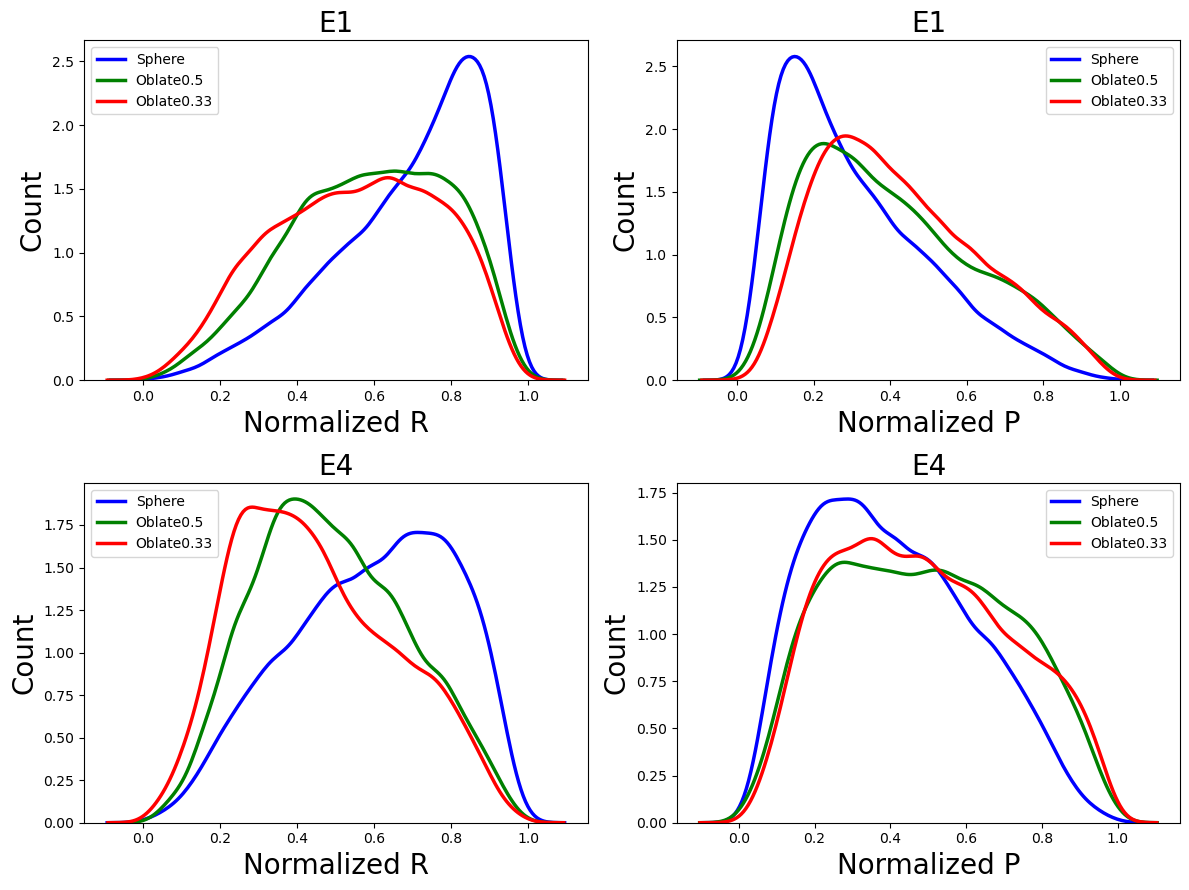

In [15]:
# In this part of the code, we plot the the radial and peripheral distributions for the energy levels E1 and E4

from sklearn.preprocessing import MinMaxScaler
from matplotlib.backends.backend_pdf import PdfPages

# Create a 2x2 grid of subplots for E1 and E4 only
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))


scaler = MinMaxScaler()


shape_colors = {"S": "blue", "Oblate12": "green", "Oblate13": "red"}


energy_levels = ["E1", "E4"]


pdf_pages = PdfPages("distr_rp_E14.pdf")

legend_labels = {"S": "Sphere", "Oblate12": "Oblate0.5", "Oblate13": "Oblate0.33"}

for i, energy_level in enumerate(energy_levels):
    for j in range(2):
        axes[i, j].set_title(energy_level, fontsize=20)

    axes[i, 0].set_xlabel("Normalized R", fontsize=20)
    axes[i, 1].set_xlabel("Normalized P", fontsize=20)

    # Plotting histograms for 'r' in the first plot
    for shape in ["S", "Oblate12", "Oblate13"]:
        df_rp = globals()[f"df_rp_{shape}_{energy_level}"]
        df_Control = globals()[f"df_Control_{shape}"]

        data_r = scaler.fit_transform(df_rp["r"].values.reshape(-1, 1)).flatten()
        data_r_Control = scaler.fit_transform(df_Control["r"].values.reshape(-1, 1)).flatten()

        sns.kdeplot(data=data_r, ax=axes[i, 0], color=shape_colors[shape], linewidth=2.5, label=legend_labels[shape])

    # Plotting histograms for 'p' in the second plot
    for shape in ["S", "Oblate12", "Oblate13"]:
        df_rp = globals()[f"df_rp_{shape}_{energy_level}"]
        df_Control = globals()[f"df_Control_{shape}"]

        data_p = scaler.fit_transform(df_rp["p"].values.reshape(-1, 1)).flatten()
        data_p_Control = scaler.fit_transform(df_Control["p"].values.reshape(-1, 1)).flatten()

        sns.kdeplot(data=data_p, ax=axes[i, 1], color=shape_colors[shape], linewidth=2.5, label=legend_labels[shape])

    axes[i, 0].set_ylabel("Count", fontsize=20)
    axes[i, 0].legend(loc="upper left")
    axes[i, 1].set_ylabel("Count", fontsize=20)
    axes[i, 1].legend(loc="upper right")

plt.tight_layout()


pdf_pages.savefig()


pdf_pages.close()


plt.show()